# Data Preparation

In [2]:
from helpers.helper_functions import read_and_set_df, set_datatypes, get_plotly_colors, pd, np, msno, make_subplots, go, plt, sns, train_test_split, LinearRegression, IterativeImputer, KNNImputer, OneHotEncoder, make_pipeline, StandardScaler, LogisticRegression, KFold, cross_val_score, SVR, mse, ff

In [3]:
df = read_and_set_df('data/train.csv', train=False)

set_datatypes(df)

df.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,No,28.0,No,> 2 Years,Yes,40454,26,217,yes
1,2,Male,76,No,3.0,No,1-2 Year,No,33536,26,183,no
2,3,Male,47,No,28.0,No,> 2 Years,Yes,38294,26,27,yes
3,4,Male,21,Yes,11.0,Yes,< 1 Year,No,28619,152,203,no
4,5,Female,29,Yes,41.0,Yes,< 1 Year,No,27496,152,39,no


In [4]:
df.describe(include='all')

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
count,380999.000000,379948,370107.000000,380948,380999.000000,380948,380948,380948,380999.000000,380999.000000,380948.000000,380999
unique,NaN,2,NaN,2,NaN,2,3,2,NaN,NaN,NaN,2
top,NaN,Male,NaN,No,NaN,No,1-2 Year,Yes,NaN,NaN,NaN,no
freq,NaN,205447,NaN,206635,NaN,206635,200228,192328,NaN,NaN,NaN,334297
mean,190500.000000,NaN,38.852091,NaN,26.388641,NaN,NaN,NaN,30527.700690,112.035331,154.344475,NaN
std,109985.081943,NaN,15.632180,NaN,13.230348,NaN,NaN,NaN,17242.997675,54.203334,83.673075,NaN
min,1.000000,NaN,20.000000,NaN,0.000000,NaN,NaN,NaN,-9997.000000,1.000000,10.000000,NaN
25%,95250.500000,NaN,25.000000,NaN,15.000000,NaN,NaN,NaN,24371.000000,29.000000,82.000000,NaN
50%,190500.000000,NaN,36.000000,NaN,28.000000,NaN,NaN,NaN,31656.000000,133.000000,154.000000,NaN
75%,285749.500000,NaN,49.000000,NaN,35.000000,NaN,NaN,NaN,39390.000000,152.000000,227.000000,NaN


## Missing Values

Die Funktion `heatmap()` von `missingno` misst die Nullkorrelation: wie stark das Vorhandensein oder Fehlen einer Variable das Vorhandensein einer anderen Variable beeinflusst.

Die Nullkorrelation reicht von -1 (wenn eine Variable auftritt, tritt die andere definitiv nicht auf) über 0 (auftauchende oder nicht auftauchende Variablen haben keinen Einfluss aufeinander) bis 1 (wenn eine Variable auftritt, tritt die andere definitiv auf).


In [5]:
# Count Missing Values per Variable und in DataFrame überführen
y_count_mv = pd.DataFrame(df.isnull().sum())
y_count_mv.columns = ['count']
y_count_mv.index.names = ['Name']
y_count_mv['Name'] = y_count_mv.index
y_count_mv =  y_count_mv[y_count_mv['count'] != 0]
y_count_mv.sort_values(by=['count'], inplace = True, ascending=True)


missing_values = pd.DataFrame(y_count_mv['count'] / len(df) * 100)
missing_values.columns = ['count']
missing_values.index.names = ['Name']
missing_values.sort_values(by=['count'], inplace = True, ascending=True)

x = y_count_mv['Name']

# Creating two subplots
fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                    shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(go.Bar(
    x=missing_values['count'],
    y=x,
    marker=dict(
        color='rgba(18, 63, 90, 0.95)',
        line=dict(
            color='rgba(18, 63, 90, 1.0)',
            width=1),
    ),
    name='Relative Anzahl der fehlenden Werte (%)',
    orientation='h',
), 1, 1)

fig.append_trace(go.Scatter(
    x=y_count_mv['count'], y=x,
    mode='lines+markers',
    line_color='rgb(0, 68, 27)',
    name='Absolute Anzahl der fehlenden Werte',
), 1, 2)

fig.update_layout(
    title='Absolute und relative Anzahl der Missing Values je Variable',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        domain=[0, 0.85],
    ),
    yaxis2=dict(
        showgrid=False,
        showline=True,
        showticklabels=False,
        linecolor='rgba(102, 102, 102, 0.8)',
        linewidth=2,
        domain=[0, 0.85],
    ),
    xaxis=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0, 0.42],
    ),
    xaxis2=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0.47, 1],
        side='top',
        dtick=2000,
    ),
    legend=dict(x=0.029, y=1.038, font_size=10),
    margin=dict(l=100, r=20, t=70, b=70),
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
)

annotations = []

y_s = np.round(missing_values['count'], decimals=2)
y_nw = np.rint(y_count_mv['count'])

# Adding labels
for ydn, yd, xd in zip(y_nw, y_s, x):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2',
                            y=xd, x=ydn+500,
                            text='{:,}'.format(ydn),
                            font=dict(family='Arial', size=12,
                                      color='rgb(0, 68, 27)'),
                            showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1',
                            y=xd, x=yd+ 0.15,
                            text=str(yd) + '%',
                            font=dict(family='Arial', size=12,
                                      color='rgb(18, 63, 90)'),
                            showarrow=False))

fig.update_layout(annotations=annotations)

fig.show()

Wie viele Werte sind insgesamt Missing Values in dem Datensatz

In [6]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
total_percentage_missing = (total_missing/total_cells) * 100 *100
print(f"{round(total_percentage_missing,2)} %")

26.68 %


In [7]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information 
        return mis_val_table_ren_columns

In [8]:
train_missing= missing_values_table(df)
train_missing

Your selected dataframe has 12 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
age,10892,2.9
gender,1051,0.3
driving_license,51,0.0
previously_insured,51,0.0
vehicle_age,51,0.0
vehicle_damage,51,0.0
vintage,51,0.0


### Verteilung der Missing Values 

<AxesSubplot:>

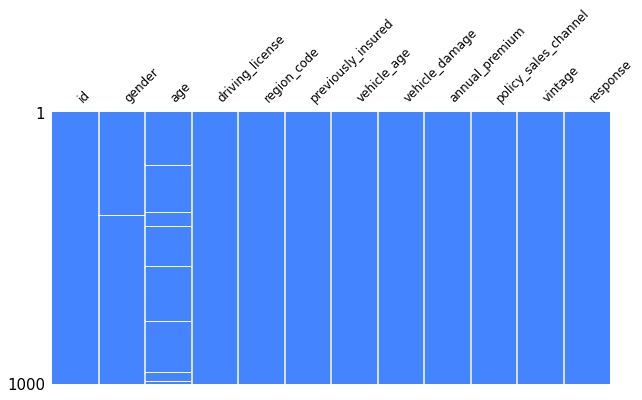

In [9]:
# Verteilung der Missing Values innerhalb der Variablen 
msno.matrix(df.sample(1000), sparkline=False, figsize=(10,5), fontsize=12, color=(0.27, 0.52, 1.0))

<AxesSubplot:>

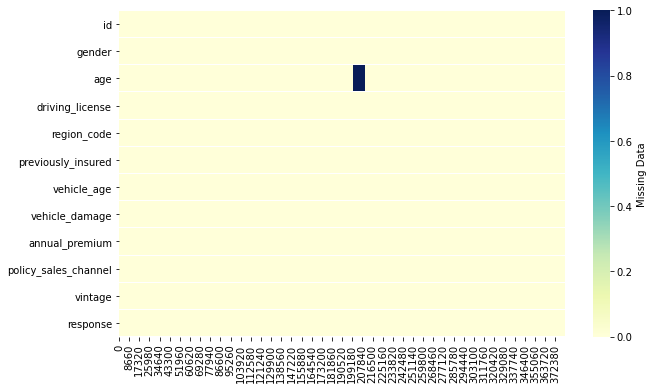

In [10]:

plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})


<AxesSubplot:>

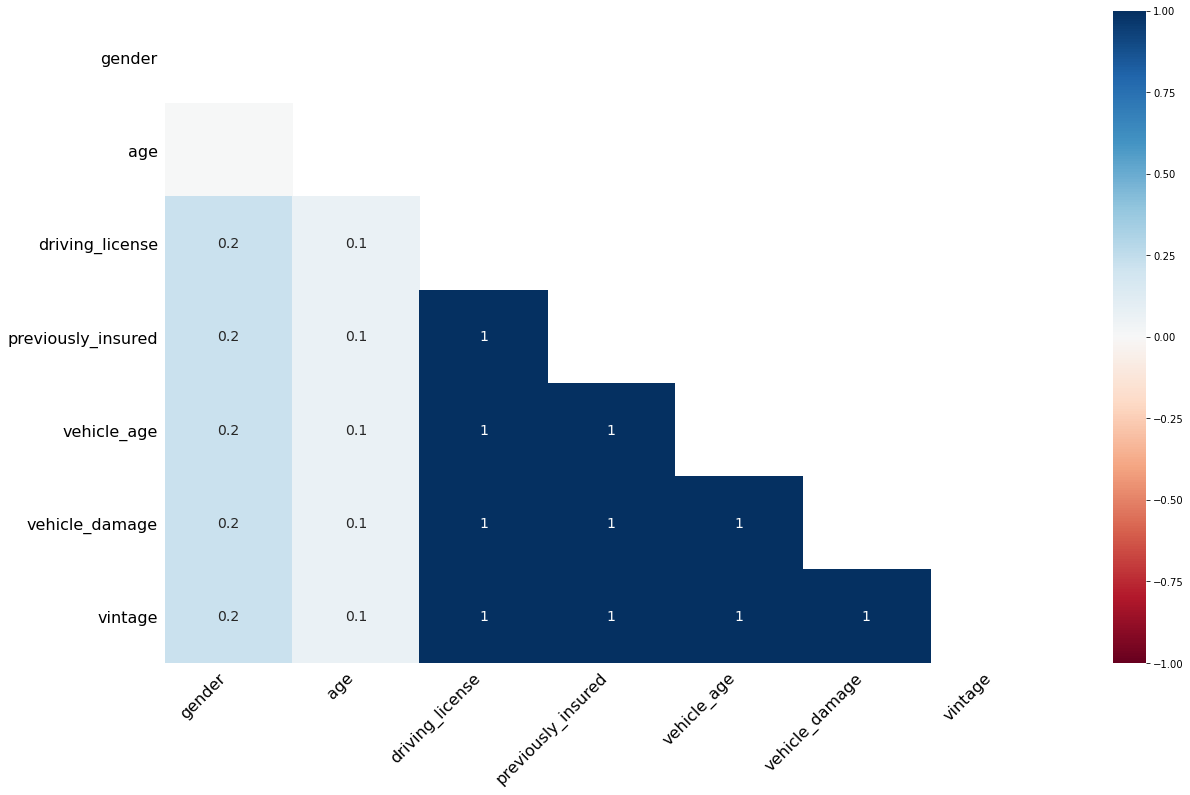

In [11]:
# Visualize the correlation between the number of
# missing values in different columns as a heatmap
msno.heatmap(df)



Um dieses Diagramm zu interpretieren, lesen Sie es aus einer Top-Down-Perspektive. Clusterblätter, die in einem Abstand von Null miteinander verbunden sind, sagen das Vorhandensein des jeweils anderen vollständig voraus - eine Variable könnte immer leer sein, wenn eine andere gefüllt ist, oder sie könnten immer beide gefüllt oder beide leer sein, und so weiter. In diesem speziellen Beispiel klebt das Dendrogramm die Variablen zusammen, die erforderlich und daher in jedem Datensatz vorhanden sind.

Clusterblätter, die sich in der Nähe von Null aufspalten, aber nicht bei Null, sagen sich gegenseitig sehr gut, aber immer noch unvollkommen voraus. Wenn Ihre eigene Interpretation des Datensatzes darin besteht, dass diese Spalten tatsächlich in Null übereinstimmen oder übereinstimmen sollten (z. B. als BETEILIGUNGSFAKTOR FAHRZEUG 2 und FAHRZEUG-TYPCODE 2), dann sagt Ihnen die Höhe des Clusterblatts in absoluten Zahlen, wie oft die Datensätze "nicht übereinstimmen" oder falsch abgelegt sind - d. h. wie viele Werte Sie ausfüllen oder streichen müssten, wenn Sie dazu geneigt sind.

Beschreibung: 
Das Dendrogramm verwendet einen hierarchischen Clustering-Algorithmus, um die Variablen anhand ihrer Nullkorrelation gegeneinander abzugrenzen. 


Erklärung: 
Clutster, die sich in bei Null aufspalten, sagen sich untereinander vollkommen voraus (Korrelation von 1). Auf Grundlage 

Auf jeder Stufe des Baums werden die Variablen auf der Grundlage der Kombination aufgeteilt, die den Abstand der verbleibenden Cluster minimiert.  

Je monotoner die Variablen sind, desto näher liegt ihr Gesamtabstand bei Null und desto näher liegt ihr durchschnittlicher Abstand (die y-Achse) bei Null.   

<AxesSubplot:>

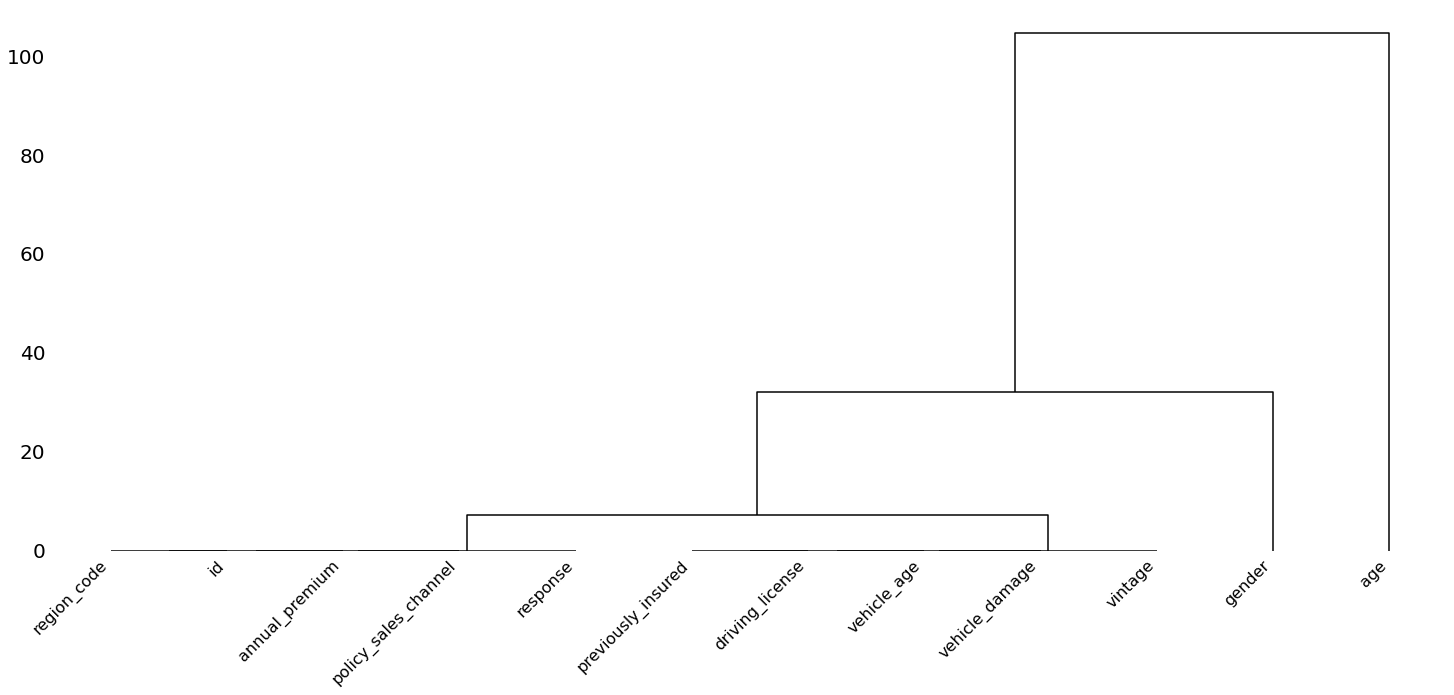

In [12]:
msno.dendrogram(df, orientation='top')

In [13]:
# Verteilung der Missing Values innerhalb der Variablen 
#msno.matrix(df, freq='Tim', sparkline=False)
#df.iloc[:, 0]
#msno.matrix(df.set_index(pd.period_range('1/1/2011', '2/1/2015', freq='M')) , freq='BQ')

In [14]:
# Drop all rows with NaNs in A OR B

#x = df.dropna(subset=['previously_insured', 'driving_license', 'vehicle_age', 'vehicle_damage', 'vintage'])


df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380999 entries, 0 to 380998
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   id                    380999 non-null  int64   
 1   gender                379948 non-null  category
 2   age                   370107 non-null  Int64   
 3   driving_license       380948 non-null  category
 4   region_code           380999 non-null  float64 
 5   previously_insured    380948 non-null  category
 6   vehicle_age           380948 non-null  category
 7   vehicle_damage        380948 non-null  category
 8   annual_premium        380999 non-null  Int64   
 9   policy_sales_channel  380999 non-null  Int64   
 10  vintage               380948 non-null  Int64   
 11  response              380999 non-null  category
dtypes: Int64(4), category(6), float64(1), int64(1)
memory usage: 32.0 MB


In [15]:
df_na_bool = pd.DataFrame(pd.isna(df))

df.drop(df_na_bool[(df_na_bool['previously_insured'] == True) & 
           (df_na_bool['driving_license'] == True) &
           (df_na_bool['vehicle_age'] == True) &
           (df_na_bool['vehicle_damage'] == True) &
           (df_na_bool['vintage'] == True)].index, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380948 entries, 0 to 380998
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   id                    380948 non-null  int64   
 1   gender                379948 non-null  category
 2   age                   370107 non-null  Int64   
 3   driving_license       380948 non-null  category
 4   region_code           380948 non-null  float64 
 5   previously_insured    380948 non-null  category
 6   vehicle_age           380948 non-null  category
 7   vehicle_damage        380948 non-null  category
 8   annual_premium        380948 non-null  Int64   
 9   policy_sales_channel  380948 non-null  Int64   
 10  vintage               380948 non-null  Int64   
 11  response              380948 non-null  category
dtypes: Int64(4), category(6), float64(1), int64(1)
memory usage: 24.0 MB


In [16]:
pd.isna(df).sum()

id                          0
gender                   1000
age                     10841
driving_license             0
region_code                 0
previously_insured          0
vehicle_age                 0
vehicle_damage              0
annual_premium              0
policy_sales_channel        0
vintage                     0
response                    0
dtype: int64

Listenweiser Fallausschluss - Wir haben mittels dem listenweisen Fallausschluss 51 Zeilen aus dem Datensatz entfernt. Dabei haben wir ebenfalls die Anzahl der missing values bei den Variablen von age und gender um 51 Werte reduziert.

## Behandlung von Anomalien

### Age

- Untergrenze: 18
- Obergrenze: 100

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380948 entries, 0 to 380998
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   id                    380948 non-null  int64   
 1   gender                379948 non-null  category
 2   age                   370107 non-null  Int64   
 3   driving_license       380948 non-null  category
 4   region_code           380948 non-null  float64 
 5   previously_insured    380948 non-null  category
 6   vehicle_age           380948 non-null  category
 7   vehicle_damage        380948 non-null  category
 8   annual_premium        380948 non-null  Int64   
 9   policy_sales_channel  380948 non-null  Int64   
 10  vintage               380948 non-null  Int64   
 11  response              380948 non-null  category
dtypes: Int64(4), category(6), float64(1), int64(1)
memory usage: 24.0 MB


In [18]:
index_max_age = df[df["age"] >= 100].index
df.drop(index_max_age, inplace=True)

index_min_age = df[df["age"] < 18].index
df.drop(index_min_age, inplace=True)

df["age"].describe()

count    370007.000000
mean         38.820579
std          15.509008
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: age, dtype: float64

### Annual Premium

- Untergrenze: 0
- Obergrenze: 150.000

In [19]:
index_min_premium = df[df["annual_premium"] <= 0].index
df.drop(index_min_premium, inplace=True)

index_max_premium = df[df["annual_premium"] >= 150000].index
df.drop(index_max_premium, inplace=True)

df["annual_premium"].describe()

count    380290.000000
mean      30452.227190
std       16371.775769
min        2630.000000
25%       24397.000000
50%       31661.000000
75%       39384.000000
max      147075.000000
Name: annual_premium, dtype: float64

## Train Test Splitting

In [20]:
X = df.drop('response', axis=1)
y = df[['response']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=42)

#### Cross-Validation

In [21]:
#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
model = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
np.mean(np.absolute(scores))

nan

## Imputationverfahren für die Variable Age

#### Mittelwertersetzung

In [22]:
# Create dataset
imputed_train = pd.DataFrame()
imputed_test = pd.DataFrame()
X_test_mean = X_test['age']
X_train_mean = X_train['age']



# Fill missing values of Age with the average of Age (mean)
imputed_train[ 'age' ] = X_train_mean.fillna(round(X_train_mean.mean(),0)).astype("Int64")

imputed_train.head()

imputed_train_age = np.array(imputed_train['age'], dtype=int)
actual_df_age = np.array(df['age'].dropna(), dtype=int)

#### Visualisierung der Imputationsverfahren

In [25]:
hist_data = [imputed_train_age, actual_df_age]

group_labels = ['imputed_train_age', 'actual_df_age']
colors = ['#333F44', '#37AA9C']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors, rug_text=None, show_rug=False)

# Add title
fig.update_layout(title_text='Verteilung der Variable nach Imputationsverfahren')
fig.show()

#### Lineare Regression 

#### Lineare Regression

##### ONE HOT ENCODING

ONE HOT ENCODiNG transformiert kategoriale Variablen zu binären Variablen mittels des 'one-hot' Verfahrens.
Dieser Schritt der Kodierung kategorialer Variablen ist nötig, um diese später in linearen Modellen und Vektor Maschinen zu verwenden.

In [ ]:
df_copy = df.copy()

# simple approach 
#OHE = pd.get_dummies(df_copy)

# X = df_copy.select_dtypes(include=['category'])

# OHE = OneHotEncoder().fit(X)

# binary_array = OHE.transform(X).toarray()
# binary_array.shape


(380290, 14)

In [ ]:

imp_reg = LinearRegression().fit(X_train, y_train)

imp_reg_results = imp_reg.predict(X_test)
len(imp_reg_results), imp_reg_results

(73891,
 array([[38.76537925],
        [37.06280345],
        [37.06280345],
        ...,
        [37.06280345],
        [39.60917633],
        [40.18698562]]))

#### SVM

In [ ]:
X_train_svm = X_train
X_test_svm = X_test
y_train_svm = y_train
y_test_svm = y_test

svr = SVR(kernel = 'linear')
svr.fit(X_train_svm,y_train_svm)
np.sqrt(mse(svr.predict(X_test_svm),y_test_svm))

ValueError: Cannot cast object dtype to float64

In [ ]:
df.to_csv('./data/clean_data.csv', sep="$", decimal=".")